# Alzheimer's Disease Prediction

## Introduction & Background

Alzheimer's disease is a progressive neurodegenerative disorder that primarily affects the brain, leading to memory loss, cognitive decline, and eventually an inability to carry out even the simplest tasks. It’s the most common cause of dementia among older adults ([National Institute on Aging](https://www.nia.nih.gov/health/alzheimers-and-dementia/alzheimers-disease-fact-sheet)).

According to the [Alzheimer's Association](https://www.alz.org/alzheimers-dementia), as of 2023, an estimated 6.7 million Americans are living with Alzheimer's disease. This number is expected to increase to 13.8 million by 2060. Globally, it is estimated that over 55 million people worldwide have dementia, with Alzheimer's disease being the most common form. As of 2025, Alzheimer's disease affects a significant portion of the population both in the United States and globally. The global number of people with dementia is expected to **reach 139 million by 2050**, with much of this increase occurring in developing countries ([Alzheimer's Disease International](https://www.alzint.org/about/dementia-facts-figures/dementia-statistics/)).

These statistics highlight the growing impact of Alzheimer's disease on individuals, families, and healthcare systems worldwide.

## Project Topic

The project will focus on analyzing Alzheimer's disease using publicly available data to:
- Analyze the factors associated with the disease and perform statistical data analysis
- Use Supervised Machine Learning techniques to predict the risk of disease given patient health information
- TODO: Add ML Algorithms

### Goal

The main goal and motivation behind this project is to closely understand health information factors that could be contributing to the early onset of Alzheimer's disease. The predictive analysis will be helpful to patients who are on the cusp of being diagnosed with Alzheimer's.

### Expected Outcomes & Learnings

- Brief understanding of how various factors affect the diagnoses of Alzheimer's
- How Supervised Machine Learning can be applied to these types of problems?
- Given certain health factors for a patient, how well can ML techniques be used to predict early onset of Alzheimer's


## Datasets

- This project will be using publicly available data from Kaggle for [🧠 Alzheimer's Disease Dataset 🧠](https://www.kaggle.com/datasets/rabieelkharoua/alzheimers-disease-dataset)
- Per datasource, this data was generated synthetically and released on Kaggle for educational purposes.
- The dataset includes major health factors and diagnosis for each patient, which makes it ideal for Supervised Machine Learning tasks.

## Dataset Description

- Contains 35 columns and 2149 rows
- Contains both categorical and continuous variables

The Name:Description of the dataset attribute below copied over from the [🧠 Alzheimer's Disease Dataset 🧠](https://www.kaggle.com/datasets/rabieelkharoua/alzheimers-disease-dataset).

| Name                      | Description                                                                                                                                 |
|---------------------------|---------------------------------------------------------------------------------------------------------------------------------------------|
| PatientID                 | A unique identifier assigned to each patient (4751 to 6900).                                                                                |
| Age                       | The age of the patients ranges from 60 to 90 years.                                                                                         |
| Gender                    | Gender of the patients, where 0 represents Male and 1 represents Female.                                                                    |
| Ethnicity                 | The ethnicity of the patients, coded as follows                                                                                             |
| 0                         | Caucasian                                                                                                                                   |
| 1                         | African American                                                                                                                            |
| 2                         | Asian                                                                                                                                       |
| 3                         | Other                                                                                                                                       |
| EducationLevel            | The education level of the patients, coded as follows                                                                                       |
| 0                         | None                                                                                                                                        |
| 1                         | High School                                                                                                                                 |
| 2                         | Bachelor's                                                                                                                                  |
| 3                         | Higher                                                                                                                                      |
| BMI                       | Body Mass Index of the patients, ranging from 15 to 40.                                                                                     |
| Smoking                   | Smoking status, where 0 indicates No and 1 indicates Yes.                                                                                   |
| AlcoholConsumption        | Weekly alcohol consumption in units, ranging from 0 to 20.                                                                                  |
| PhysicalActivity          | Weekly physical activity in hours, ranging from 0 to 10.                                                                                    |
| DietQuality               | Diet quality score, ranging from 0 to 10.                                                                                                   |
| SleepQuality              | Sleep quality score, ranging from 4 to 10.                                                                                                  |
| FamilyHistoryAlzheimers   | Family history of Alzheimer's Disease, where 0 indicates No and 1 indicates Yes.                                                            |
| CardiovascularDisease     | Presence of cardiovascular disease, where 0 indicates No and 1 indicates Yes.                                                               |
| Diabetes                  | Presence of diabetes, where 0 indicates No and 1 indicates Yes.                                                                             |
| Depression                | Presence of depression, where 0 indicates No and 1 indicates Yes.                                                                           |
| HeadInjury                | History of head injury, where 0 indicates No and 1 indicates Yes.                                                                           |
| Hypertension              | Presence of hypertension, where 0 indicates No and 1 indicates Yes.                                                                         |
| SystolicBP                | Systolic blood pressure, ranging from 90 to 180 mmHg.                                                                                       |
| DiastolicBP               | Diastolic blood pressure, ranging from 60 to 120 mmHg.                                                                                      |
| CholesterolTotal          | Total cholesterol levels, ranging from 150 to 300 mg/dL.                                                                                    |
| CholesterolLDL            | Low-density lipoprotein cholesterol levels, ranging from 50 to 200 mg/dL.                                                                   |
| CholesterolHDL            | High-density lipoprotein cholesterol levels, ranging from 20 to 100 mg/dL.                                                                  |
| CholesterolTriglycerides  | Triglycerides levels, ranging from 50 to 400 mg/dL.                                                                                         |
| MMSE                      | Mini-Mental State Examination score, ranging from 0 to 30. Lower scores indicate cognitive impairment.                                      |
| FunctionalAssessment      | Functional assessment score, ranging from 0 to 10. Lower scores indicate greater impairment.                                                |
| MemoryComplaints          | Presence of memory complaints, where 0 indicates No and 1 indicates Yes.                                                                    |
| BehavioralProblems        | Presence of behavioral problems, where 0 indicates No and 1 indicates Yes.                                                                  |
| ADL                       | Activities of Daily Living score, ranging from 0 to 10. Lower scores indicate greater impairment. Lower scores indicate greater impairment. |
| Confusion                 | Presence of confusion, where 0 indicates No and 1 indicates Yes.                                                                            |
| Disorientation            | Presence of disorientation, where 0 indicates No and 1 indicates Yes.                                                                       |
| PersonalityChanges        | Presence of personality changes, where 0 indicates No and 1 indicates Yes.                                                                  |
| DifficultyCompletingTasks | Presence of difficulty completing tasks, where 0 indicates No and 1 indicates Yes.                                                          |
| Forgetfulness             | Presence of forgetfulness, where 0 indicates No and 1 indicates Yes.                                                                        |
| Diagnosis                 | Diagnosis status for Alzheimer's Disease, where 0 indicates No and 1 indicates Yes.                                                         |
| DoctorInCharge            | This column contains confidential information about the doctor in charge, with "XXXConfid" as the value for all patients.                   |



### Data Sources Citation (APA)

- Rabie El Kharoua. (2024). 🧠 Alzheimer's Disease Dataset 🧠 [Data set]. Kaggle. https://doi.org/10.34740/KAGGLE/DSV/8668279



# Import Required Packages

In [1]:
import numpy as np
import pandas as pd
import kagglehub
import matplotlib.pyplot as plt
import seaborn as sns

/Users/am368a/.pyenv/versions/csca5622-supervised-ml-final/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm



# Load Dataset
This cell imports the required libraries and prepares the dataset for analysis. Data will be directly imported from Kaggle Hub using the library `kagglehub`

In [2]:
dataset_path = kagglehub.dataset_download("rabieelkharoua/alzheimers-disease-dataset")
print("Path to dataset files:", dataset_path)

Path to dataset files: /Users/am368a/.cache/kagglehub/datasets/rabieelkharoua/alzheimers-disease-dataset/versions/1


In [3]:
df = pd.read_csv(f'{dataset_path}/alzheimers_disease_data.csv')

In [4]:
# Let's check the first five rows of the data
df.head()

,PatientID,Age,Gender,Ethnicity,EducationLevel,BMI,Smoking,AlcoholConsumption,PhysicalActivity,DietQuality,...,MemoryComplaints,BehavioralProblems,ADL,Confusion,Disorientation,PersonalityChanges,DifficultyCompletingTasks,Forgetfulness,Diagnosis,DoctorInCharge
0,4751,73,0,0,2,22.927749,0,13.297218,6.327112,1.347214,...,0,0,1.725883,0,0,0,1,0,0,XXXConfid
1,4752,89,0,0,0,26.827681,0,4.542524,7.619885,0.518767,...,0,0,2.592424,0,0,0,0,1,0,XXXConfid
2,4753,73,0,3,1,17.795882,0,19.555085,7.844988,1.826335,...,0,0,7.119548,0,1,0,1,0,0,XXXConfid
3,4754,74,1,0,1,33.800817,1,12.209266,8.428001,7.435604,...,0,1,6.481226,0,0,0,0,0,0,XXXConfid
4,4755,89,0,0,0,20.716974,0,18.454356,6.310461,0.795498,...,0,0,0.014691,0,0,1,1,0,0,XXXConfid


# Data Cleaning

- Drop columns
- Check data types
- Check for null values
- Check for nan values
- Remove unneccessary columns
- Check data distribution 

## Drop Columns
Lookign at at the first 5 rows, we can see that `DoctorInCharge` has a dummy data `XXXConfig` and it does not really contirbute to disease features. 
Similarly `PatientID` is PII(Personal Identifiable Information) for the patient which is not required for disease prediction. 

Let's go ahead and drop these two columns before further analysis 




In [5]:
data = df.drop(['PatientID', 'DoctorInCharge'], axis=1)
data.head()

,Age,Gender,Ethnicity,EducationLevel,BMI,Smoking,AlcoholConsumption,PhysicalActivity,DietQuality,SleepQuality,...,FunctionalAssessment,MemoryComplaints,BehavioralProblems,ADL,Confusion,Disorientation,PersonalityChanges,DifficultyCompletingTasks,Forgetfulness,Diagnosis
0,73,0,0,2,22.927749,0,13.297218,6.327112,1.347214,9.025679,...,6.518877,0,0,1.725883,0,0,0,1,0,0
1,89,0,0,0,26.827681,0,4.542524,7.619885,0.518767,7.151293,...,7.118696,0,0,2.592424,0,0,0,0,1,0
2,73,0,3,1,17.795882,0,19.555085,7.844988,1.826335,9.673574,...,5.895077,0,0,7.119548,0,1,0,1,0,0
3,74,1,0,1,33.800817,1,12.209266,8.428001,7.435604,8.392554,...,8.965106,0,1,6.481226,0,0,0,0,0,0
4,89,0,0,0,20.716974,0,18.454356,6.310461,0.795498,5.597238,...,6.045039,0,0,0.014691,0,0,1,1,0,0


## Check Null Values

In [15]:
null_values = data.isnull().sum()
null_values

Age                          0
Gender                       0
Ethnicity                    0
EducationLevel               0
BMI                          0
Smoking                      0
AlcoholConsumption           0
PhysicalActivity             0
DietQuality                  0
SleepQuality                 0
FamilyHistoryAlzheimers      0
CardiovascularDisease        0
Diabetes                     0
Depression                   0
HeadInjury                   0
Hypertension                 0
SystolicBP                   0
DiastolicBP                  0
CholesterolTotal             0
CholesterolLDL               0
CholesterolHDL               0
CholesterolTriglycerides     0
MMSE                         0
FunctionalAssessment         0
MemoryComplaints             0
BehavioralProblems           0
ADL                          0
Confusion                    0
Disorientation               0
PersonalityChanges           0
DifficultyCompletingTasks    0
Forgetfulness                0
Diagnosi

Dataset has no `null` values in any of the columns. This is verified using the non0null column size which is `2149` which is equal to number of observations

## Check Nan Values

In [9]:
nan_values = data.isnull().sum()
nan_values

Age                          0
Gender                       0
Ethnicity                    0
EducationLevel               0
BMI                          0
Smoking                      0
AlcoholConsumption           0
PhysicalActivity             0
DietQuality                  0
SleepQuality                 0
FamilyHistoryAlzheimers      0
CardiovascularDisease        0
Diabetes                     0
Depression                   0
HeadInjury                   0
Hypertension                 0
SystolicBP                   0
DiastolicBP                  0
CholesterolTotal             0
CholesterolLDL               0
CholesterolHDL               0
CholesterolTriglycerides     0
MMSE                         0
FunctionalAssessment         0
MemoryComplaints             0
BehavioralProblems           0
ADL                          0
Confusion                    0
Disorientation               0
PersonalityChanges           0
DifficultyCompletingTasks    0
Forgetfulness                0
Diagnosi

Dataset has no `NaN` values in any of the columns. This is verified using the  column size which is `2149` which is equal to number of observations

## Check Data Types

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2149 entries, 0 to 2148
Data columns (total 33 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Age                        2149 non-null   int64  
 1   Gender                     2149 non-null   int64  
 2   Ethnicity                  2149 non-null   int64  
 3   EducationLevel             2149 non-null   int64  
 4   BMI                        2149 non-null   float64
 5   Smoking                    2149 non-null   int64  
 6   AlcoholConsumption         2149 non-null   float64
 7   PhysicalActivity           2149 non-null   float64
 8   DietQuality                2149 non-null   float64
 9   SleepQuality               2149 non-null   float64
 10  FamilyHistoryAlzheimers    2149 non-null   int64  
 11  CardiovascularDisease      2149 non-null   int64  
 12  Diabetes                   2149 non-null   int64  
 13  Depression                 2149 non-null   int64

In [7]:
data.describe()

,Age,Gender,Ethnicity,EducationLevel,BMI,Smoking,AlcoholConsumption,PhysicalActivity,DietQuality,SleepQuality,...,FunctionalAssessment,MemoryComplaints,BehavioralProblems,ADL,Confusion,Disorientation,PersonalityChanges,DifficultyCompletingTasks,Forgetfulness,Diagnosis
count,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,...,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000
mean,74.908795,0.506282,0.697534,1.286645,27.655697,0.288506,10.039442,4.920202,4.993138,7.051081,...,5.080055,0.208004,0.156817,4.982958,0.205212,0.158213,0.150768,0.158678,0.301536,0.353653
std,8.990221,0.500077,0.996128,0.904527,7.217438,0.453173,5.757910,2.857191,2.909055,1.763573,...,2.892743,0.405974,0.363713,2.949775,0.403950,0.365026,0.357906,0.365461,0.459032,0.478214
min,60.000000,0.000000,0.000000,0.000000,15.008851,0.000000,0.002003,0.003616,0.009385,4.002629,...,0.000460,0.000000,0.000000,0.001288,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,67.000000,0.000000,0.000000,1.000000,21.611408,0.000000,5.139810,2.570626,2.458455,5.482997,...,2.566281,0.000000,0.000000,2.342836,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,75.000000,1.000000,0.000000,1.000000,27.823924,0.000000,9.934412,4.766424,5.076087,7.115646,...,5.094439,0.000000,0.000000,5.038973,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,83.000000,1.000000,1.000000,2.000000,33.869778,1.000000,15.157931,7.427899,7.558625,8.562521,...,7.546981,0.000000,0.000000,7.581490,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
max,90.000000,1.000000,3.000000,3.000000,39.992767,1.000000,19.989293,9.987429,9.998346,9.999840,...,9.996467,1.000000,1.000000,9.999747,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# Exploratory Data Analysis (EDA)

## Heatmap 

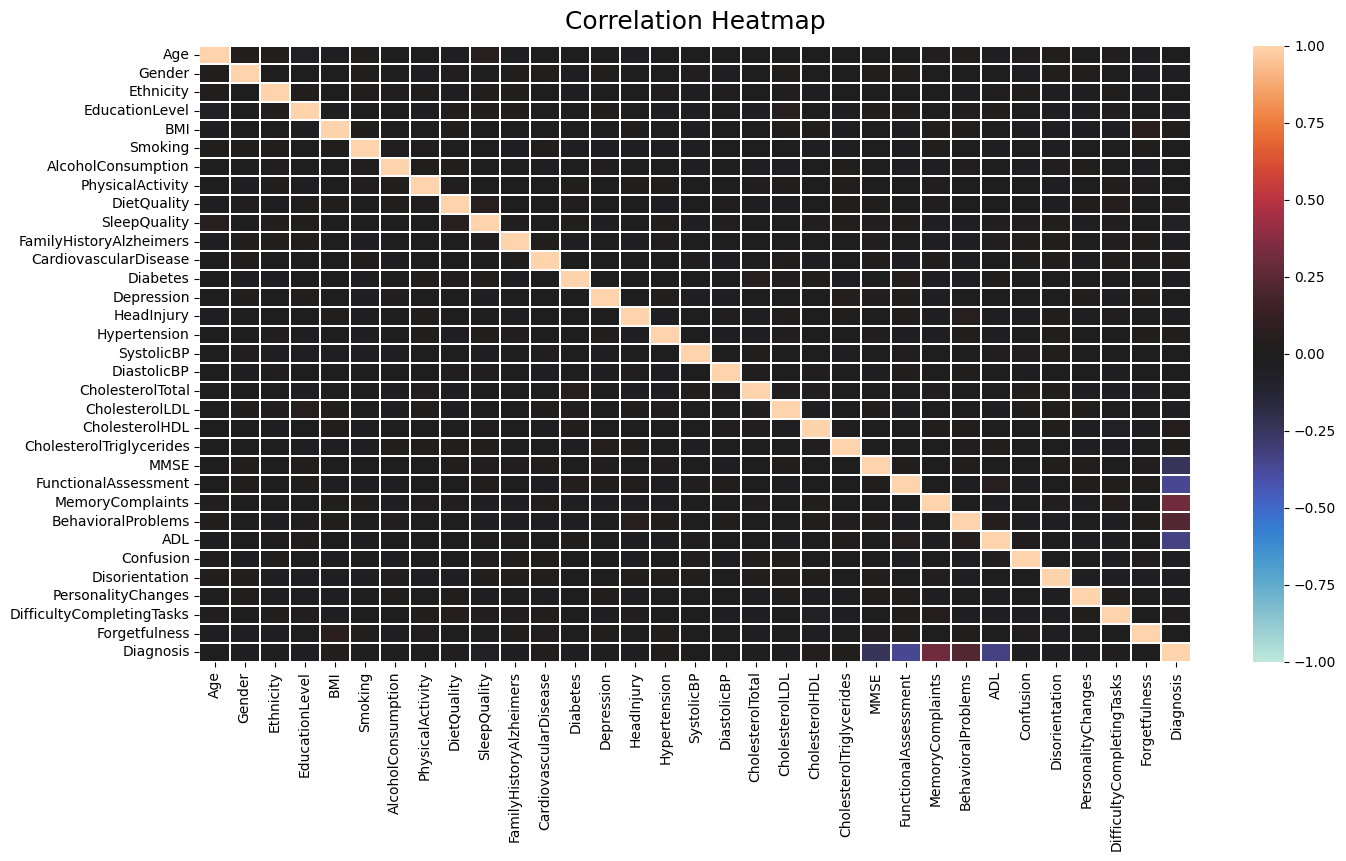

In [10]:
# ref: https://medium.com/@szabo.bibor/how-to-create-a-seaborn-correlation-heatmap-in-python-834c0686b88e

plt.figure(figsize=(16, 8))
# sns.palplot(sns.color_palette('husl', 10))
heatmap = sns.heatmap(data.corr(), vmin=-1, vmax=1, annot=False, cmap='icefire', linewidths=0.1)
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':18}, pad=12)
# save heatmap as .png file
# dpi - sets the resolution of the saved image in dots/inches
# bbox_inches - when set to 'tight' - does not allow the labels to be cropped
plt.savefig('heatmap.png', dpi=300, bbox_inches='tight')




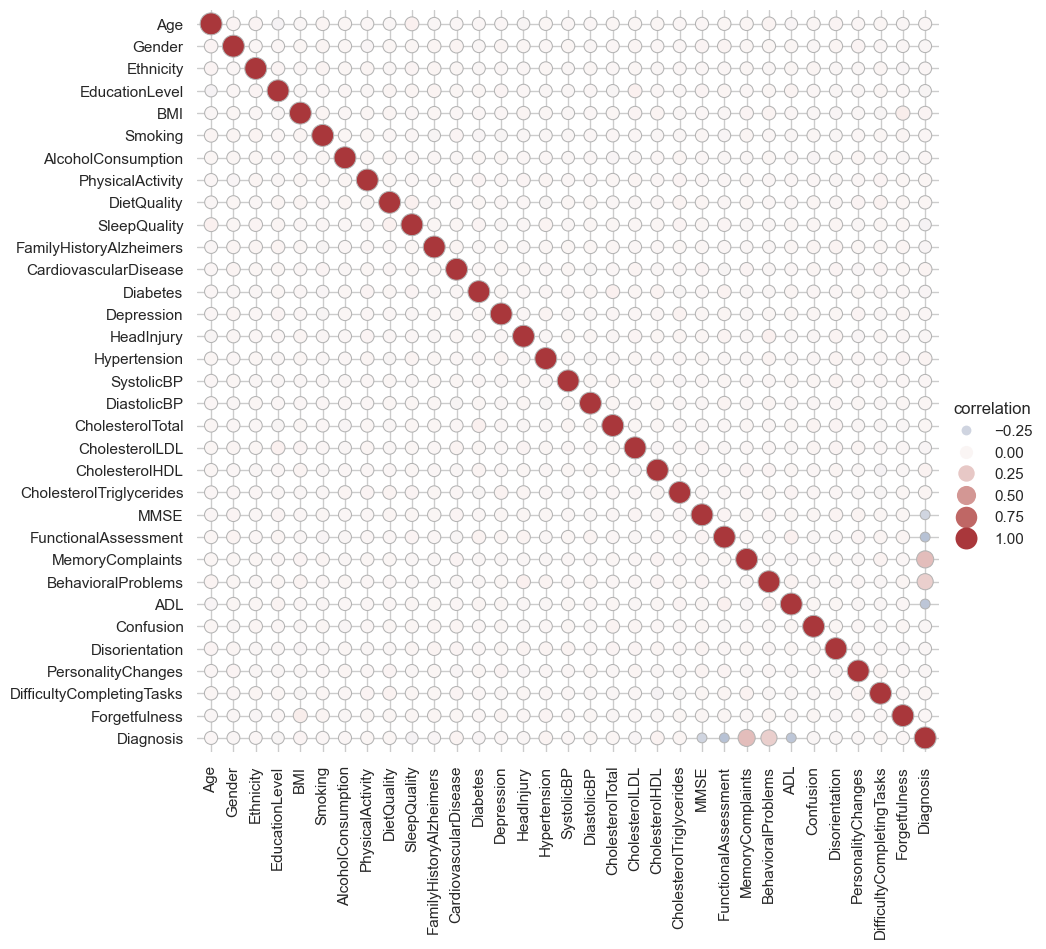

In [11]:
# Ref: https://seaborn.pydata.org/examples/heat_scatter.html

sns.set_theme(style="whitegrid")
corr_mat = data.corr().stack().reset_index(name="correlation")
g = sns.relplot(
    data=corr_mat,
    x="level_0", y="level_1", hue="correlation", size="correlation",
    palette="vlag", hue_norm=(-1, 1), edgecolor=".7",
    height=10, sizes=(50, 250), size_norm=(-.2, .8),
)

# Tweak the figure to finalize
g.set(xlabel="", ylabel="", aspect="equal")
g.despine(left=True, bottom=True)
g.ax.margins(.02)
for label in g.ax.get_xticklabels():
    label.set_rotation(90)

# Feature Engineering

# Inspect Columns 

Looking closley at the columns our target variable of interest would be `Diagnosis` which is 0 for negative diagnosis (No Alzheimer's) and 1 for positive diagnosis (Alzheimer's). 
Let's separate out our `target variable` and `features`


In [12]:
target_column = 'Diagnosis'
    
y = data[target_column]
X = data.drop([target_column], axis=1)

print(f'features shape = {X.shape} | target shape = {y.size}')


features shape = (2149, 32) | target shape = 2149


In [13]:
X.head()

,Age,Gender,Ethnicity,EducationLevel,BMI,Smoking,AlcoholConsumption,PhysicalActivity,DietQuality,SleepQuality,...,MMSE,FunctionalAssessment,MemoryComplaints,BehavioralProblems,ADL,Confusion,Disorientation,PersonalityChanges,DifficultyCompletingTasks,Forgetfulness
0,73,0,0,2,22.927749,0,13.297218,6.327112,1.347214,9.025679,...,21.463532,6.518877,0,0,1.725883,0,0,0,1,0
1,89,0,0,0,26.827681,0,4.542524,7.619885,0.518767,7.151293,...,20.613267,7.118696,0,0,2.592424,0,0,0,0,1
2,73,0,3,1,17.795882,0,19.555085,7.844988,1.826335,9.673574,...,7.356249,5.895077,0,0,7.119548,0,1,0,1,0
3,74,1,0,1,33.800817,1,12.209266,8.428001,7.435604,8.392554,...,13.991127,8.965106,0,1,6.481226,0,0,0,0,0
4,89,0,0,0,20.716974,0,18.454356,6.310461,0.795498,5.597238,...,13.517609,6.045039,0,0,0.014691,0,0,1,1,0


# Distribution of target variable

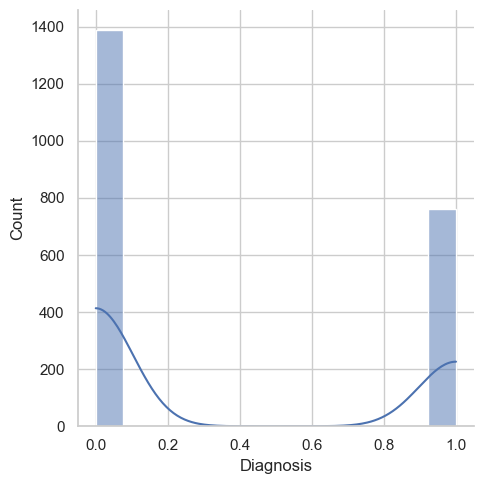

In [14]:
sns.displot(y, kde=True)